#DA24C026 - Assignment 4

In [298]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from sklearn.base import BaseEstimator
from sklearn.datasets import load_iris
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, auc

##Task 1 - Implementing Dummy Classifier

In [299]:
# Extending Base Estimator Class for DummyClassifier

class DummyBinaryClassifier(BaseEstimator):
  """ Classifier that generates random true and false """

  def __init__(self, method='bernoulli', p=0.5):
        """ Initializing parameters"""

        self.method = method
        self.p = p

  def fit(self, X, y=None):
        """ Function that does nothing, as no training is needed """
        pass

  def predict(self, X):
      """ For every X dataset, this function returns a random 0 or 1 labels based on chosen distribution.

      Bernoulli - This method generates random 0's and 1's with a given probability.
      Normal - This method will generate random discrete values sampled from a normal distribution with mean 0.5 and standard deviation 0.166.
               We need values in the interval [0,1], As a normal distribution have 99% of its values spread around modulus of 3*sd away from the mean,
               above mentioned values are reasonable.
      Unifrom - This method generates random discrete values in the interval [0,1]. """

      # Parameter p works as Probability of 1's for Bernoulli and threshold for Normal and Uniform

      if self.method == 'bernoulli':
        return np.random.binomial(1, self.p, size=len(X))

      elif self.method == 'normal':
        discrete_norm = np.random.normal(0.5, 0.166, size=len(X))
        return discrete_norm < self.p     # Conversion of Discrete values to Bool with threshold 'p'

      elif self.method == 'uniform':
        discrete_unif = np.random.uniform(0, 1, size=len(X))
        return discrete_unif < self.p     # Conversion of Discrete values to Bool with threshold 'p'
      else:
        raise ValueError("Method not found")

In [300]:
# Random Data generation for studying label distribution

data = np.random.randint(1000, size = 1000)

In [301]:
# Label Generation for different p Values

pr_true_bern = []
pr_true_norm = []
pr_true_unif = []
for i in np.linspace(0, 1, 11):
  bern = DummyBinaryClassifier(method='bernoulli', p=i)
  norm = DummyBinaryClassifier(method='normal', p=i)
  unif = DummyBinaryClassifier(method='uniform', p=i)
  pr_true_bern.append(np.mean(bern.predict(data)))
  pr_true_norm.append(np.mean(norm.predict(data)))
  pr_true_unif.append(np.mean(unif.predict(data)))

In [302]:
print("Label Distribution for Bernoulli Distribution - Proportions of Ones for p in range [0,1] with 0.1 step")
print(pr_true_bern,"\n")
print("Label Distribution for Normal Distribution - Proportions of Ones for p in range [0,1] with 0.1 step")
print(pr_true_norm,"\n")
print("Label Distribution for Uniform Distribution - Proportions of Ones for p in range [0,1] with 0.1 step")
print(pr_true_unif,"\n")

Label Distribution for Bernoulli Distribution - Proportions of Ones for p in range [0,1] with 0.1 step
[0.0, 0.093, 0.216, 0.298, 0.389, 0.495, 0.624, 0.709, 0.792, 0.891, 1.0] 

Label Distribution for Normal Distribution - Proportions of Ones for p in range [0,1] with 0.1 step
[0.003, 0.014, 0.041, 0.108, 0.269, 0.499, 0.716, 0.88, 0.963, 0.993, 0.999] 

Label Distribution for Uniform Distribution - Proportions of Ones for p in range [0,1] with 0.1 step
[0.0, 0.096, 0.21, 0.288, 0.386, 0.483, 0.606, 0.689, 0.802, 0.903, 1.0] 



**Visualizing Results**

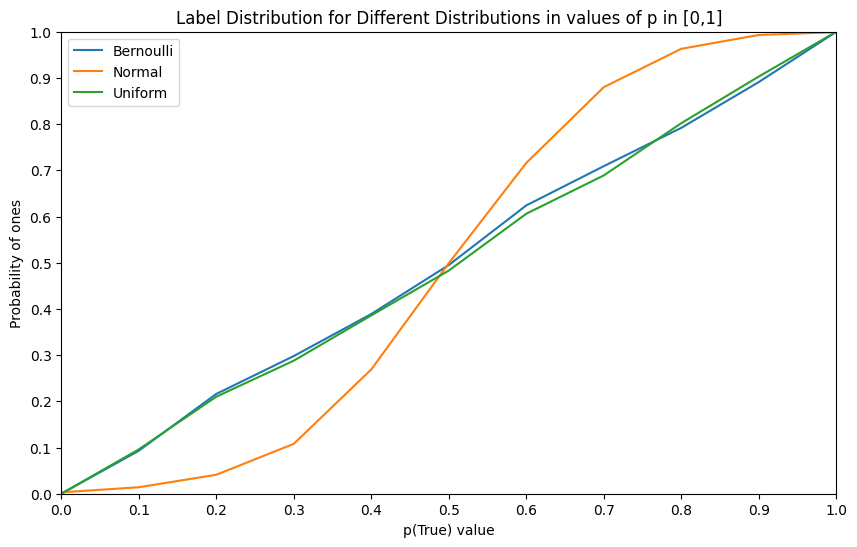

In [303]:
plt.figure(figsize=(10, 6))
plt.plot(np.linspace(0, 1, 11), pr_true_bern)
plt.plot(np.linspace(0, 1, 11), pr_true_norm)
plt.plot(np.linspace(0, 1, 11), pr_true_unif)
plt.xlabel("p(True) value")
plt.ylabel("Probability of ones")
plt.legend(['Bernoulli', 'Normal', 'Uniform'])
plt.title("Label Distribution for Different Distributions in values of p in [0,1]")
plt.xlim(0,1)
plt.yticks(np.linspace(0,1,11))
plt.xticks(np.linspace(0, 1, 11))
plt.ylim(0,1)
plt.show()

**Graph - Interpretation**

- **Gaussian Generator follows a non linear pattern for growth of ones proportion w.r.t increase in probability threshold.**

- **Bernoulli and Uniform generators grow linearly.**

**All three generators shows same proportion of ones at threshold p = 0.5**

##Task 2 - Dummy Classifier for IRIS Dataset

In [304]:
iris = load_iris()
iris_df = pd.DataFrame(data = iris.data, columns=iris.feature_names)
iris_df['target'] = iris.target

In [305]:
iris_df.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


In [306]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


As we need two labels and all 3 labels are evenly distributed in ratio 50:50:50. We can convert label '2' to 0.

In [307]:
iris_df.loc[iris_df['target'] == 2, 'target'] = 0
# Now our data have 2 classes '0' - 100 labels and '1' - 50 classes

In [308]:
# Making predictions on IRIS dataset using Bernoulli DummyClassifier

xx = iris_df.iloc[:,:-1]
yy = iris_df.iloc[:,-1].values

Our Label distribution have 33.33% of Trues and 66.67% false.
Because intially 3 classes were evenly distributed, then, in order to make target labels binary, we merged two of the classes as false labels.

Thus, for random classifier p = 0.33 is used.

In [309]:
iris_classifier = DummyBinaryClassifier(method='bernoulli', p=0.33)
y_pred = iris_classifier.predict(xx)

**Label Prior**

In [310]:
prior = np.mean(y_pred)
print("False: ", 1 - prior, "True :", prior)

False:  0.72 True : 0.28


**Performance of Classifier**

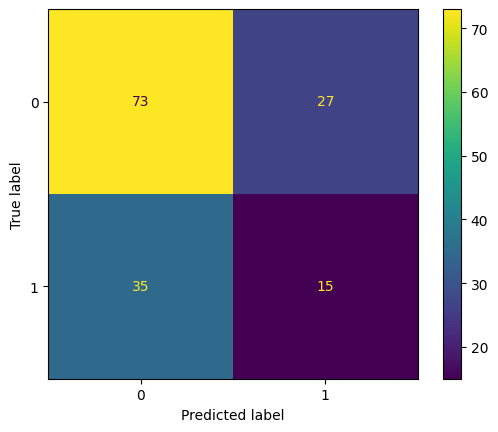

In [311]:
cm = confusion_matrix(yy, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

Our Random Bernoulli Classifier predicted approximately 55% of labels correctly. (TRUE PREDICTIONS).

As this classifier is just guessing values, the accuracy of predictions will always stay around 50%

**Experimenting with different p values**

In [312]:
# Reporting performance metrices for different values of "p".

# Following values are used from confusion Matrix for evaluation

# True Positives = cm[1][1]
# True Negatives = cm[0][0]
# False Positives = cm[0][1]
# False Negatives = cm[1][0]

precison_list, recall_tpr_list , f1_score_list , fpr_list = [],[],[],[]
for i in np.linspace(0,1,11):
  iris_classifier = DummyBinaryClassifier(method='bernoulli', p=i)
  y_pred = iris_classifier.predict(xx)
  cm = confusion_matrix(yy, y_pred)
  precison = cm[1][1]/(cm[1][1] + cm[0][1])
  recall_tpr = cm[1][1]/(cm[1][1] + cm[1][0])
  f1_score = 2*precison*recall_tpr/(precison + recall_tpr)
  fpr = cm[0][1]/(cm[0][1] + cm[0][0])
  precison_list.append(precison)
  recall_tpr_list.append(recall_tpr)
  f1_score_list.append(f1_score)
  fpr_list.append(fpr)



<ipython-input-312-444d7811c708>:15: RuntimeWarning: invalid value encountered in scalar divide
  precison = cm[1][1]/(cm[1][1] + cm[0][1])


In [313]:
precison_list[0] = 0
f1_score_list[0] = 0 # Precison and F1 Score is not defined (NaN) at p = 0, as there are no positive predictions

**P, R, F1 Line Plots**

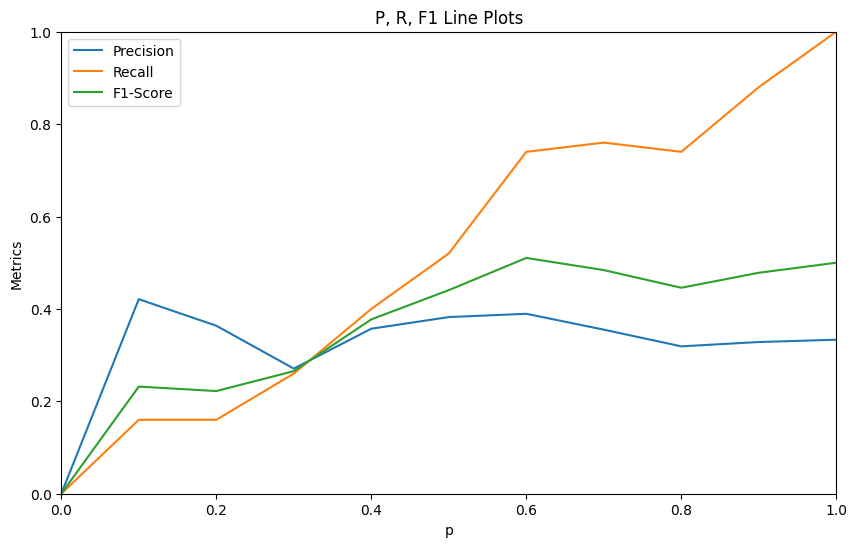

In [314]:
plt.figure(figsize=(10, 6))
plt.plot(np.linspace(0,1,11), precison_list)
plt.plot(np.linspace(0,1,11), recall_tpr_list)
plt.plot(np.linspace(0,1,11), f1_score_list)
plt.xlabel("p")
plt.ylabel("Metrics")
plt.legend(['Precision', 'Recall', 'F1-Score'])
plt.title("P, R, F1 Line Plots")
plt.xlim(0,1)
plt.ylim(0,1)
plt.show()

**Precison - Recall Curve**

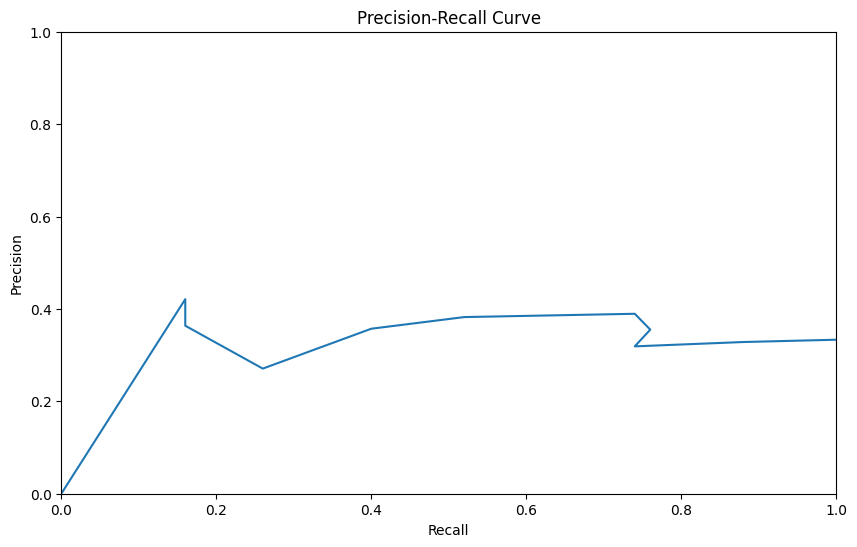

In [315]:
plt.figure(figsize=(10, 6))
plt.plot(recall_tpr_list, precison_list)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.xlim(0,1)
plt.ylim(0,1)
plt.show()

**ROC Curve**

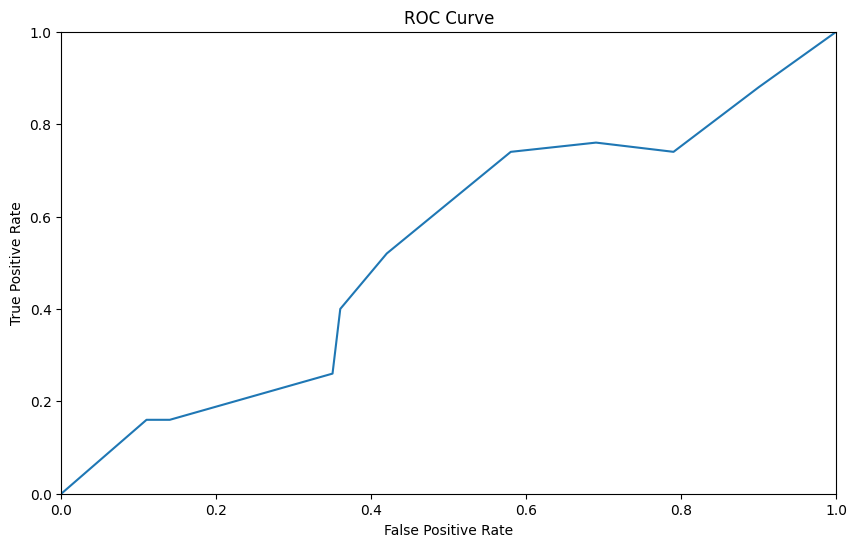

In [316]:
plt.figure(figsize=(10, 6))
plt.plot(fpr_list, recall_tpr_list)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.xlim(0,1)
plt.ylim(0,1)
plt.title("ROC Curve")
plt.show()

**Reporting Area Under ROC and PRC Curve**

In [317]:
auroc = auc(np.sort(fpr_list), np.sort(recall_tpr_list))
print(f'AUROC: {auroc}')

auprc = auc(np.sort(recall_tpr_list), np.sort(precison_list))
print(f'AUPRC: {auprc}')

AUROC: 0.53
AUPRC: 0.3224118765168276


**Interpretations**

- Since we are using a random classifier, we get AUROC close to 0.5, which indicates our model is not so efficient at distinguishing positive and negative classes.

*(It is no better than guessing.)*

- The low Area under PRC curve indicates that our random classifier is unable to do a good job on given data. Hence, there isn't sufficient tradeoff between precison and recall values.

*(Since, **P-R** tradeoff is not that good in our random classifier, the models incurs low F1 - Scores for all p.)*



##TASK 3 - Plotting Decison Boundaries

In [318]:
# For plotting decison boundary we will use features "Sepal length" and "Petal Length"
X = iris_df.loc[:,['petal length (cm)', 'sepal length (cm)']]

**Using Min Max values a grid of points is created for plotting decison boundaries**

In [319]:
x1 = X[X.columns[0]]
x2 = X[X.columns[1]]
grid_x1 = np.linspace(x1.min(), x1.max(), 100)
grid_x2 = np.linspace(x2.min(), x2.max(), 100)
x1v, x2v = np.meshgrid(grid_x1, grid_x2)

In [320]:
# Creation of data frame of the synthetic mesh data

xx = pd.DataFrame(data=np.column_stack((x1v.flatten(), x2v.flatten())), columns=X.columns)

In [340]:
y_pred = DummyBinaryClassifier(method='bernoulli', p=0.33).predict(xx)

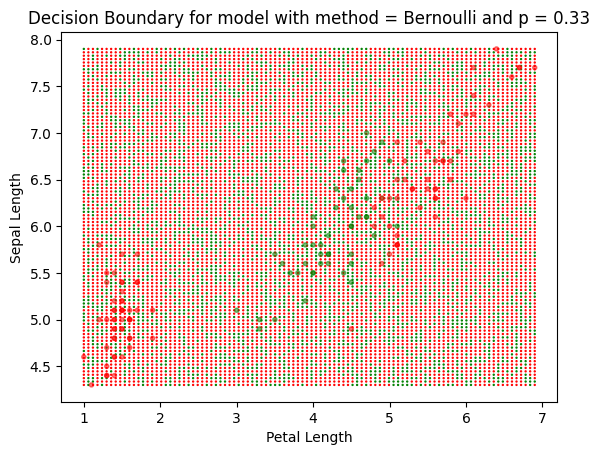

In [347]:
color_map = {0: 'red', 1: 'green'}
plt.scatter(x1v, x2v, marker='.', s=2, c=[color_map[label] for label in y_pred])
plt.scatter(x1, x2, marker='.', c=[color_map[label] for label in yy], alpha =0.5)
plt.xlabel("Petal Length")
plt.ylabel("Sepal Length")
plt.title("Decision Boundary for model with method = Bernoulli and p = 0.33")
plt.show()

As we are using a random classifier, the decison boundary is scattered all over the place.

In [348]:
# Resusable function for plotting decison boundaries

def visualize_decision_boundary(xx, y, model, ax = None):
    y_pred = model.predict(xx)
    # plot the data
    color_map = {0: 'red', 1: 'green'}
    ax.scatter(x1v, x2v, marker='.', s=2, c= [color_map[label] for label in y_pred])
    ax.scatter(x1, x2, marker='.', c=[color_map[label] for label in y], alpha = 0.5)

**Plotting Decison boundaries with different 'p' values and different methods/generators**

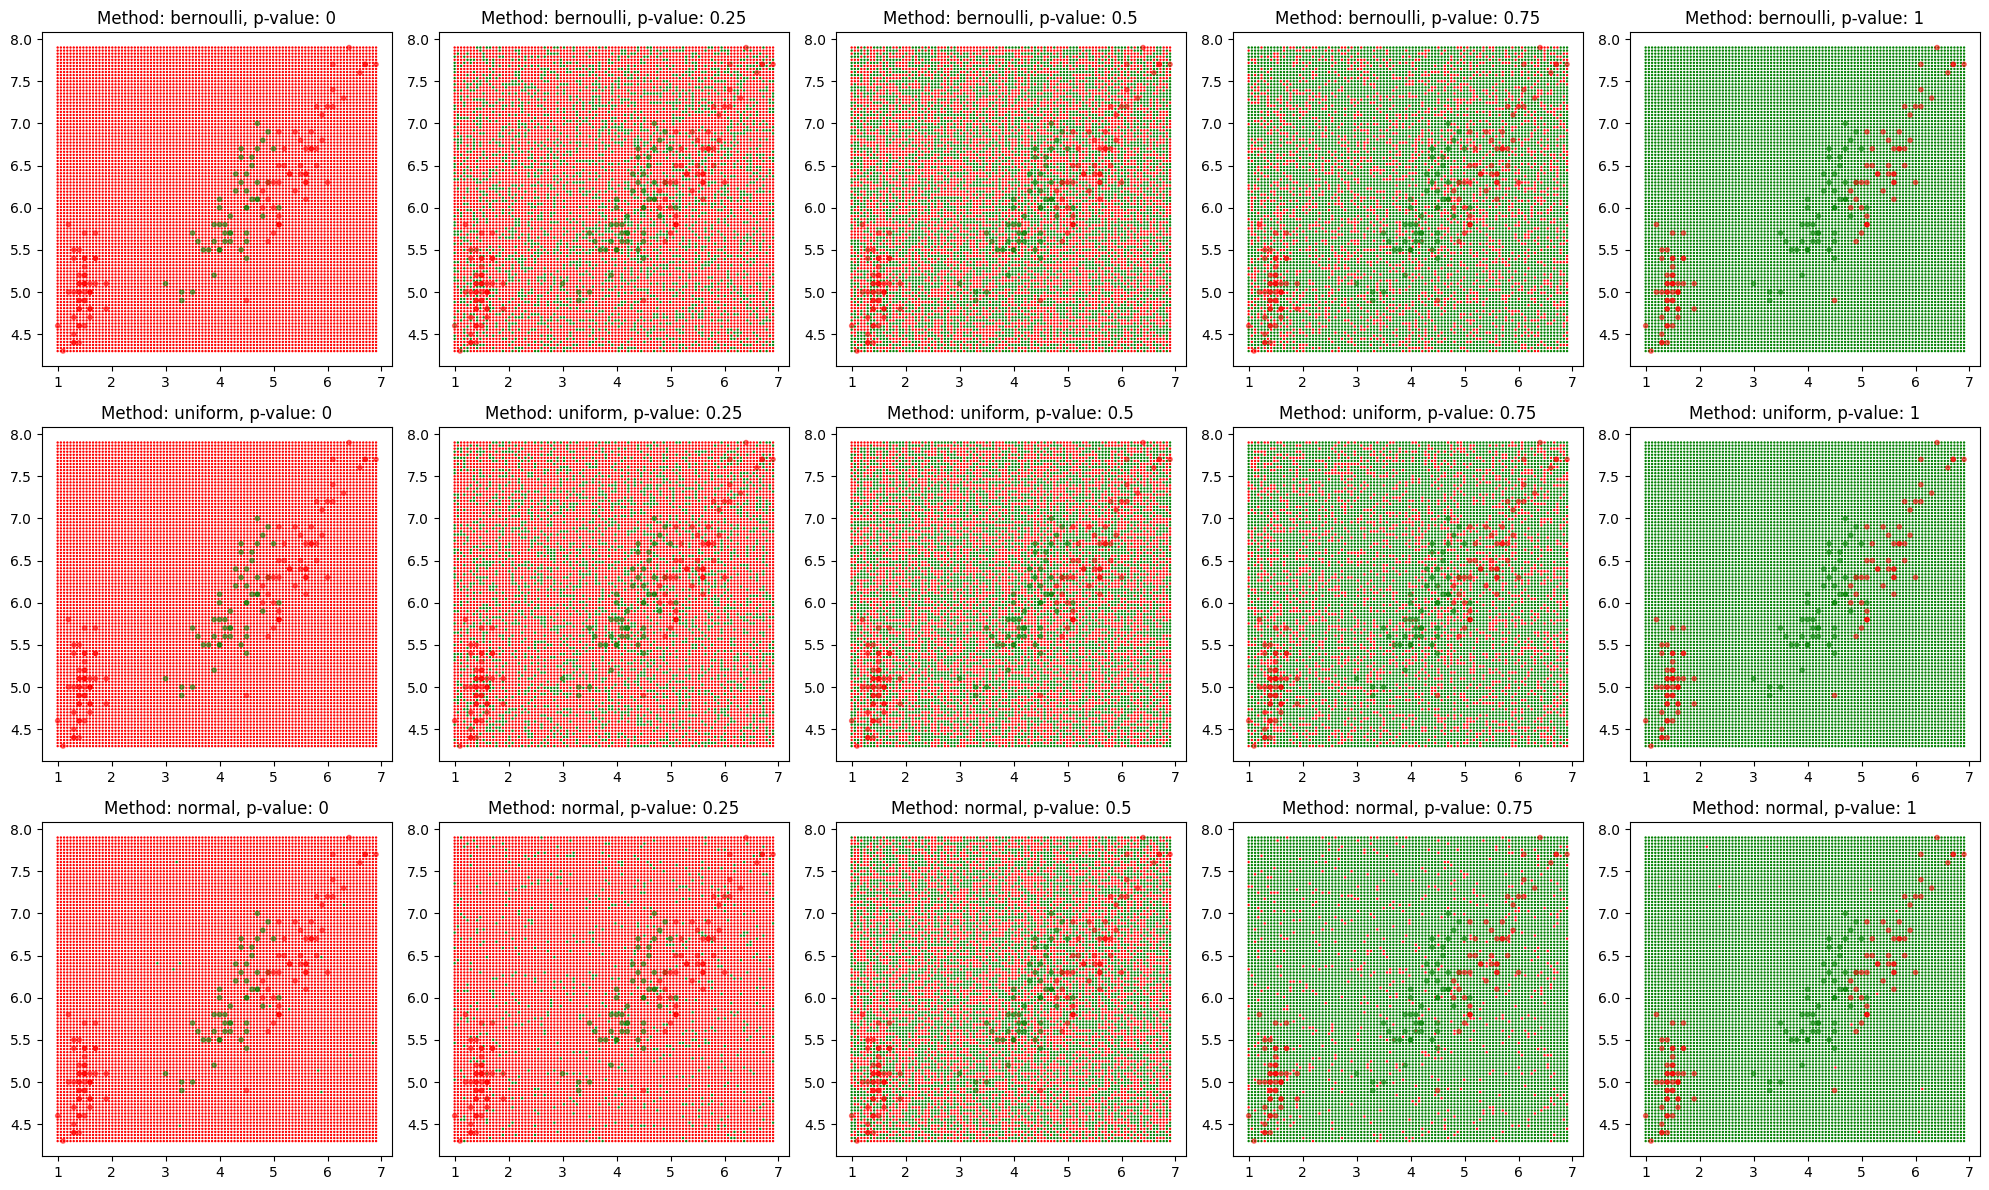

In [349]:
methods = ["bernoulli", "uniform", "normal"]
p_values = [0, 0.25, 0.5, 0.75, 1]

fig, axs = plt.subplots(3, 5, figsize=(20, 12))

for i, method in enumerate(methods):
    for j, p_value in enumerate(p_values):
        axs[i, j].set_title(f"Method: {method}, p-value: {p_value}")
        model = DummyBinaryClassifier(method=method, p=p_value)
        visualize_decision_boundary(xx, yy, model, ax=axs[i, j])

plt.tight_layout()
plt.show()

- **When the values of p are close to 0, there will be more negative predictions and hence the decision boundary is more Red.**

- **As we keep increasing the values of p, there will be more positive predictions and thus, decison boundary will be greener.**

- **As we can observe that decison boundary is scattered all over the place, the reason behind it is because our classifiers are just doing random guesses for every label.**